In [17]:
#data processing
import pandas as pd

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns

#model/analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve



In [2]:
df = pd.read_csv("C:/Users/17326/OneDrive - go.Stockton.edu/Documents/dssa/fetal_health.csv")

In [3]:
#defining features and target variable
X = df.drop(["fetal_health"], axis= 1)
y = df["fetal_health"]

In [4]:
#Stanadrdizing the data
col_names = list(X.columns)
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled = pd.DataFrame(X_Scaled, columns = col_names)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size =0.2, random_state=42) #80/20 training test split

In [22]:
#create decision tree classifier 

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

#fit the model w/ train set
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [23]:
y_pred = dt_model.predict(X_test)

In [24]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test), multi_class='ovr')  # For multiclass classification

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC:", roc_auc)

Accuracy: 0.931924882629108
Precision: 0.9298875578210575
Recall: 0.931924882629108
F1-score: 0.9294106565074547
Confusion Matrix:
 [[324   7   2]
 [ 18  45   1]
 [  1   0  28]]
ROC AUC: 0.9367483589720708


In [25]:
#get feature importance

feature_importance = dt_model.feature_importances_

#creating df to display importance scores

importance_df =pd.DataFrame({'Feature' : X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                                              Feature  Importance
8                mean_value_of_short_term_variability    0.303693
17                                     histogram_mean    0.261645
7                     abnormal_short_term_variability    0.146010
9   percentage_of_time_with_abnormal_long_term_var...    0.133263
1                                       accelerations    0.033909
0                                      baseline value    0.032834
6                            prolongued_decelerations    0.022871
3                                uterine_contractions    0.022704
13                                      histogram_max    0.018619
19                                 histogram_variance    0.009623
11                                    histogram_width    0.008293
12                                      histogram_min    0.003627
20                                 histogram_tendency    0.002116
4                                 light_decelerations    0.000793
5         

In [15]:
# Calculate ROC AUC for each class separately (one-vs-rest strategy)
y_pred_prob = dt_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

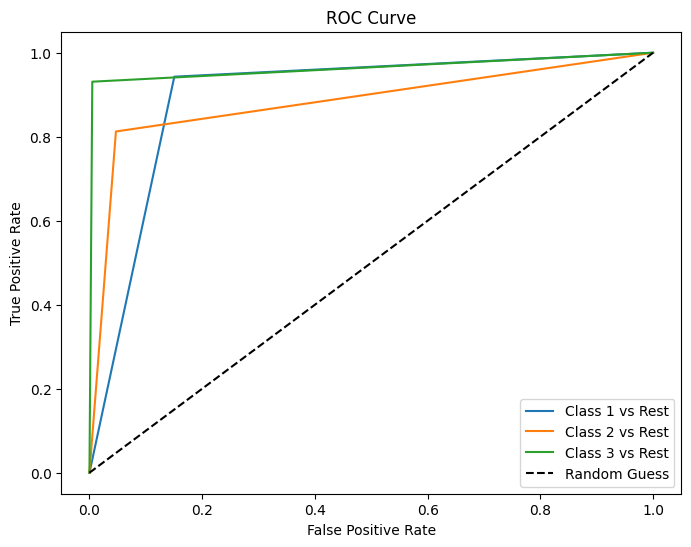

In [16]:
# Plot the ROC curve for each class separately (one-vs-rest strategy)
plt.figure(figsize=(8, 6))
for class_label in range(1, 4):  # Assuming 3 classes (1, 2, 3)
    fpr, tpr, _ = roc_curve(y_test == class_label, y_pred_prob[:, class_label - 1])  # Adjust for 0-based index
    plt.plot(fpr, tpr, label=f'Class {class_label} vs Rest')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()